### Step 1: Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Step 2 : Read the Data

In [2]:
url="https://raw.githubusercontent.com/goradbj/MachineLearning/main/Classification/Logistic%20Regression/insurance_data.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


### Step 3 : Understand,clean and preprocess the data

In [4]:
df.shape

(27, 2)

In [5]:
df.size

54

In [6]:
df.columns

Index(['age', 'bought_insurance'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [8]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [9]:
df.isna().sum()

age                 0
bought_insurance    0
dtype: int64

In [10]:
#Here no missing values are there,So lets get forward

##### Data Visualization

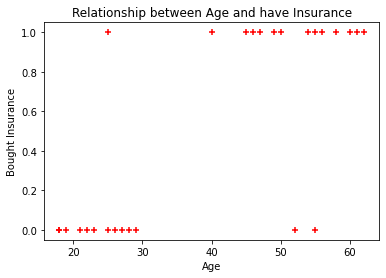

In [11]:
plt.scatter(df.age,df.bought_insurance,marker="+",color="red")
plt.xlabel("Age")
plt.ylabel("Bought Insurance")
plt.title("Relationship between Age and have Insurance")
plt.show()

### Step 4 : Dive the data

In [12]:
#Splot data into input(X) and target(y)
X=df[["age"]]
y=df[["bought_insurance"]]

In [13]:
X.head()

,age
0,22
1,25
2,47
3,52
4,46


In [14]:
y.head()

,bought_insurance
0,0
1,0
2,1
3,0
4,1


In [15]:
#Split data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
print(df.shape)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27, 2)
(27, 1)
(27, 1)
(21, 1)
(21, 1)
(6, 1)
(6, 1)


### Step 5 : Build model

In [17]:
bimodel=LogisticRegression()
bimodel.fit(X_train,y_train)

/home/divyasale/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [18]:
#Value of m
bimodel.coef_

array([[0.11474491]])

In [19]:
#Value of c
bimodel.intercept_

array([-4.677569])

     Mathematical model for this dataset is :
      sig(z)=1/(1+ e^[-(0.1147*z--4.6775)])

In [20]:
X_test,y_test

(    age
 24   50
 8    62
 25   54
 7    60
 23   45
 1    25,
     bought_insurance
 24                 1
 8                  1
 25                 1
 7                  1
 23                 1
 1                  0)

### Do the prediction

In [21]:
y_pred=bimodel.predict(X_test)

In [22]:
y_pred

array([1, 1, 1, 1, 1, 0])

In [23]:
bimodel.predict([[20]])

array([0])

In [24]:
bimodel.predict([[46]])

array([1])

In [25]:
bimodel.predict([[52]])

array([1])

In [26]:
bimodel.predict([[35]])

array([0])

In [27]:
bimodel.score(X_test,y_test)

1.0

##### This model gives 100% accuracy

### Step 7: Save model for deployment

Model can saved using

    1.pickle
    2.joblib

#### Pickle

In [30]:
import pickle

In [34]:
# how to save model
pickle.dump(bimodel,open('insurance_detection.sav','wb'))

In [37]:
## how to load model
bimodel1=pickle.load(open("insurance_detection.sav",'rb'))

In [38]:
bimodel1.predict([[15]])

array([0])

#### Joblib

In [35]:
import joblib

In [39]:
#How to Save model
joblib.dump(bimodel1,open('insurance_detection1.sav','wb'))

In [40]:
#How to load model
bimodel2=joblib.load(open("insurance_detection1.sav",'rb'))

In [41]:
bimodel2.predict([[72]])

array([1])